In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn 


In [2]:
import ipyparallel as ipp

cluster = ipp.Cluster(engines="local" , n=5)


cluster.start_cluster_sync()


Starting 5 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


<Cluster(cluster_id='1686051066-36ru', profile='default', controller=<running>, engine_sets=['1686051067'])>

In [3]:
#reading the data using pandas

data = pd.read_csv("crx.data", header=None)
pd.set_option('display.max_rows', 1000)

#there is no columnes name if you set header=True it will throw a error

In [4]:
# create a list with variable names  or column names
varnames = [f"A{s}" for s in range(1,17)]

In [5]:
#inserting the column names
data.columns = varnames


#print(data.to_string())

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
#we find ? is 

data = data.replace(["?" ,"*"],np.nan)

#checking how many null values are there
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [7]:
#checking the datatypes and select the what rows to convert the datatypes we recuried
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [8]:
#some object varabiles as float data types

data["A2"] = data["A2"].astype("float")

data["A14"] = data["A14"].astype("float")

data[["A3","A8"]] = data[["A3" ,"A8"]].astype("int")

#there are also much more of the datatypes float , float32 , float64 

#rename the target column name

data.rename(columns={"A14" : "target"} , inplace = True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,target,A15,A16
0,b,30.83,0,u,g,w,v,1,t,t,1,f,g,202.0,0,+
1,a,58.67,4,u,g,q,h,3,t,t,6,f,g,43.0,560,+
2,a,24.50,0,u,g,q,h,1,t,f,0,f,g,280.0,824,+
3,b,27.83,1,u,g,w,v,3,t,t,5,t,g,100.0,3,+
4,b,20.17,5,u,g,w,v,1,t,f,0,f,s,120.0,0,+


In [9]:
data["A16"] = data["A16"].map({"+":1 ,"-":0})
data.dtypes

A1         object
A2        float64
A3          int64
A4         object
A5         object
A6         object
A7         object
A8          int64
A9         object
A10        object
A11         int64
A12        object
A13        object
target    float64
A15         int64
A16         int64
dtype: object

In [10]:
#Add missing values at random positions in four variable 
#this is some example we taken as missing values

random.seed(9001)

values = list(set([random.randint(0, len(data)) for p in range(0, 100)]))

data.loc[values, ["A3", "A8", "A9", "A10"]] = np.nan

data.isnull().sum()

A1        12
A2        12
A3        92
A4         6
A5         6
A6         9
A7         9
A8        92
A9        92
A10       92
A11        0
A12        0
A13        0
target    13
A15        0
A16        0
dtype: int64

In [11]:
#saving as csv file

data.to_csv("we_need_to_clean.csv", index=False)

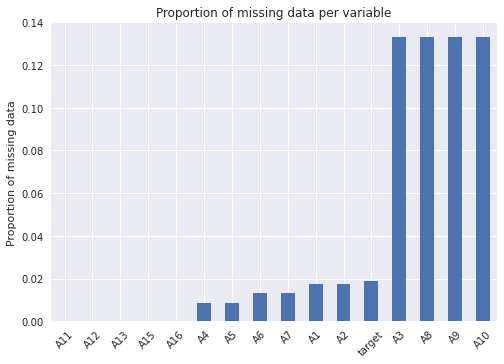

In [12]:

#reading the data
processing = pd.read_csv("we_need_to_clean.csv")

#ploting the data 

with plt.style.context("seaborn"):
    processing.isnull().mean().sort_values(ascending=True
                                          ).plot.bar(rot=45)
    plt.ylabel("Proportion of missing data")
    plt.title("Proportion of missing data per variable")

In [13]:
# we just drop the values using null values

drop_values = processing.dropna()

#will show all colums are removes null values
drop_values.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
target    0
A15       0
A16       0
dtype: int64

In [14]:
print(f"Total number of observations: {len(processing)}")

print(f"Number of observations without missing data{len(drop_values)}")

Total number of observations: 690
Number of observations without missing data564


In [15]:
#we can also using feature-engine
from feature_engine.imputation import DropMissingData

#the imputer to automatically find the variables with missing data
feature = DropMissingData(variables=None,missing_only=True)

feature.fit(processing)

feature.variables_

#Remove observations with missing data in the previous variables:
data = feature.transform(processing)


# Performing mean or median imputation

In [16]:
#imputer we use fill missing values  mean  medain etc ..

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#we can also see using feature_engine 
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer

In [17]:
#we all have last indication processing variable

X_train,X_test,y_train,y_test = train_test_split(processing.drop("target" , axis=1)
                                                ,processing["target"],test_size=0.2,random_state=0)



In [18]:
"""exclude="O" is an argument passed to select_dtypes()
to exclude columns with object data type ("O" represents object 
type in pandas). In other words, it will select columns that are 
not of object type, i.e., numeric columns"""

#normal codeing 

numeric_vars = X_train.select_dtypes(exclude="O").columns.to_list()

print(numeric_vars)

median_values = X_train[numeric_vars].median().to_dict()

print(median_values)

#we can fit the data 
x_train = X_train.fillna(value=median_values)
x_test = X_test.fillna(value=median_values )

#it will fill all values with median_values ['A2', 'A3', 'A8', 'A11', 'A15', 'A16']


['A2', 'A3', 'A8', 'A11', 'A15', 'A16']
{'A2': 28.67, 'A3': 2.0, 'A8': 1.0, 'A11': 0.0, 'A15': 5.0, 'A16': 0.0}


In [19]:
#WE caputer non numerical values in a list

remaining_var = [var for var in X_train.columns if var not in numeric_vars]

remaining_var

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [20]:
#using sklearn 

imputer = SimpleImputer(strategy="median")

#remainder passthrough remaing unchnage 
ct = ColumnTransformer([("imputer",imputer, numeric_vars)],remainder="passthrough")

ct.fit(X_train)

ct.named_transformers_.imputer.statistics_

x_train_ = ct.transform(X_train)
x_test_ = ct.transform(X_test)


#then we convert the  values

x_train = pd.DataFrame(x_train_,columns=numeric_vars + remaining_var)

x_train.head()

,A2,A3,A8,A11,A15,A16,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,22.75,2,1,7,809,1,b,u,g,q,v,NaN,NaN,t,g
1,39.92,5,0,0,0,0,b,u,g,i,bb,f,f,f,g
2,23.25,1,0,0,0,1,b,u,g,c,v,t,f,f,s
3,48.33,12,16,0,0,1,b,u,g,m,v,t,f,f,s
4,28,3,0,0,67,0,b,u,g,w,v,f,f,t,g


In [21]:
#using feature_engine 


imputer = MeanMedianImputer(imputation_method="median",variables=numeric_vars)


imputer.fit(X_train)
#checking
imputer.imputer_dict_

x_train = imputer.fit(X_train)


X_train_= imputer.transform(X_train)
X_test_ = imputer.transform(X_test)

X_train_.isnull().sum()

A1      5
A2      0
A3      0
A4      5
A5      5
A6      5
A7      5
A8      0
A9     75
A10    75
A11     0
A12     0
A13     0
A15     0
A16     0
dtype: int64

# Imputing categorical variables 

In [22]:
#we can changes with  categorical variables

#X_train, X_test, Y_train, Y_test = train_test_split(processing.drop("target", axis=1), processing["target"], test_size=0.3, random_state=10)



In [23]:
catgeorical_vars = X_train_.select_dtypes(include="O").columns.to_list()



In [24]:
# Access a single value using iloc

frequent_values = X_train_[catgeorical_vars].mode().iloc[0].to_dict()

#using mode you know in stat mode more reapated values
frequent_values


x_train = X_train_.fillna(value=frequent_values)
x_test = X_test_.fillna(value=frequent_values)

x_test.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A15    0
A16    0
dtype: int64

In [25]:
x_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,A16
14,a,45.83,10.0,u,g,q,v,5.0,t,t,7,t,g,0,1
586,b,64.08,20.0,u,g,x,h,17.0,t,t,9,t,g,1000,1
140,a,31.25,3.0,u,g,cc,h,0.0,t,t,9,t,g,0,1
492,b,39.25,9.0,u,g,m,v,6.0,t,t,14,f,g,4607,1
350,a,26.17,2.0,u,g,j,j,0.0,f,f,0,t,g,1,0


In [30]:
#using feature_engine 

imputer = CategoricalImputer(imputation_method = "frequent" , variables=catgeorical_vars)


imputer.fit(X_train_)


print(imputer.imputer_dict_)

x_train = imputer.transform(X_train_)

x_test =imputer.transform(X_test_)

x_train.isnull().sum()

{'A1': 'b', 'A4': 'u', 'A5': 'g', 'A6': 'c', 'A7': 'v', 'A9': 't', 'A10': 'f', 'A12': 'f', 'A13': 'g'}


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A15    0
A16    0
dtype: int64